In [1]:
import pandas as pd

# Load datasets
train_features = pd.read_csv("training_set_features.csv")
train_labels = pd.read_csv("training_set_labels.csv")
test_features = pd.read_csv("test_set_features.csv")

# Display first few rows
print(train_features.head())
print(train_labels.head())


   respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0               

In [2]:
print(train_features.info())  # Check data types and missing values
print(train_labels.info())
print(train_features.describe())  # Summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

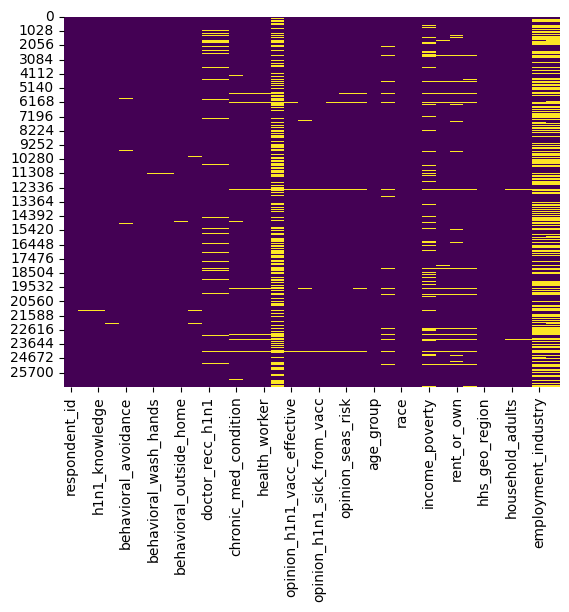

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
sns.heatmap(train_features.isnull(), cbar=False, cmap="viridis")
plt.show()


In [4]:
# Fill missing categorical values with mode
for col in train_features.select_dtypes(include=["object"]).columns:
    train_features[col].fillna(train_features[col].mode()[0], inplace=True)
    test_features[col].fillna(test_features[col].mode()[0], inplace=True)

# Fill missing numerical values with median
for col in train_features.select_dtypes(include=["number"]).columns:
    train_features[col].fillna(train_features[col].median(), inplace=True)
    test_features[col].fillna(test_features[col].median(), inplace=True)


C:\Users\anshu\AppData\Local\Temp\ipykernel_18872\2416207919.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_features[col].fillna(train_features[col].mode()[0], inplace=True)
C:\Users\anshu\AppData\Local\Temp\ipykernel_18872\2416207919.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [5]:
train_features = pd.get_dummies(train_features, drop_first=True)
test_features = pd.get_dummies(test_features, drop_first=True)


In [6]:
common_cols = train_features.columns.intersection(test_features.columns)
train_features = train_features[common_cols]
test_features = test_features[common_cols]


In [7]:
from sklearn.model_selection import train_test_split

# Define feature matrix and labels
X = train_features  # Make sure this is your cleaned feature set
y_h1n1 = train_labels["h1n1_vaccine"]
y_seasonal = train_labels["seasonal_vaccine"]

# Split into training and validation sets
X_train, X_val, y_train_h1n1, y_val_h1n1, y_train_seasonal, y_val_seasonal = train_test_split(
    X, y_h1n1, y_seasonal, test_size=0.2, random_state=42
)

# Convert feature names to strings to prevent XGBoost error
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)  # <-- Fix: Use X_val instead of X_test


In [8]:
X_test = test_features  # Load the competition test dataset
X_test.columns = X_test.columns.astype(str)  # Convert column names to string


In [9]:
X_train.columns = X_train.columns.str.replace(r'[^a-zA-Z0-9_]', '', regex=True)
X_val.columns = X_val.columns.str.replace(r'[^a-zA-Z0-9_]', '', regex=True)


In [10]:
X_test.columns = X_test.columns.str.replace(r'[^a-zA-Z0-9_]', '', regex=True)


In [11]:
print(X_train.columns)


Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'age_group_3544Years', 'age_group_4554Years',
       'age_group_5564Years', 'age_group_65Years', 'education_12Years',
       'education_CollegeGraduate', 'education_SomeCollege', 'race_Hispanic',
       'race_OtherorMultiple', 'race_White', 'sex_Male',
       'income_poverty_75000', 'income_poverty_BelowPoverty',
       'marital_status_NotMarried', 'rent

In [12]:
# Ensure all column names are strings
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)


In [13]:
X_test.columns = X_test.columns.astype(str)


MODEL TRAINING

In [14]:
from xgboost import XGBClassifier

h1n1_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
seasonal_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Train the models
h1n1_model.fit(X_train, y_train_h1n1)
seasonal_model.fit(X_train, y_train_seasonal)


c:\Users\anshu\anaconda3\envs\vaccine_prediction\lib\site-packages\xgboost\core.py:158: UserWarning: [04:17:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\anshu\anaconda3\envs\vaccine_prediction\lib\site-packages\xgboost\core.py:158: UserWarning: [04:17:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [15]:
from sklearn.metrics import roc_auc_score

# Predict probabilities
y_pred_h1n1 = h1n1_model.predict_proba(X_val)[:, 1]
y_pred_seasonal = seasonal_model.predict_proba(X_val)[:, 1]

# Compute ROC AUC Score
auc_h1n1 = roc_auc_score(y_val_h1n1, y_pred_h1n1)
auc_seasonal = roc_auc_score(y_val_seasonal, y_pred_seasonal)

print(f"H1N1 Vaccine ROC AUC: {auc_h1n1}")
print(f"Seasonal Vaccine ROC AUC: {auc_seasonal}")


H1N1 Vaccine ROC AUC: 0.8193643950281119
Seasonal Vaccine ROC AUC: 0.8534557859822144


In [16]:
# Predict probabilities on test set
test_h1n1 = h1n1_model.predict_proba(test_features)[:, 1]
test_seasonal = seasonal_model.predict_proba(test_features)[:, 1]

# Create submission file
submission = pd.DataFrame({
    "respondent_id": test_features.index,
    "h1n1_vaccine": test_h1n1,
    "seasonal_vaccine": test_seasonal
})

# Save to CSV
submission.to_csv("submission.csv", index=False)
print("Submission file saved!")


Submission file saved!


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [100, 200, 300]
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=3, scoring="roc_auc")
grid_search.fit(X_train, y_train_h1n1)

print(grid_search.best_params_)


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


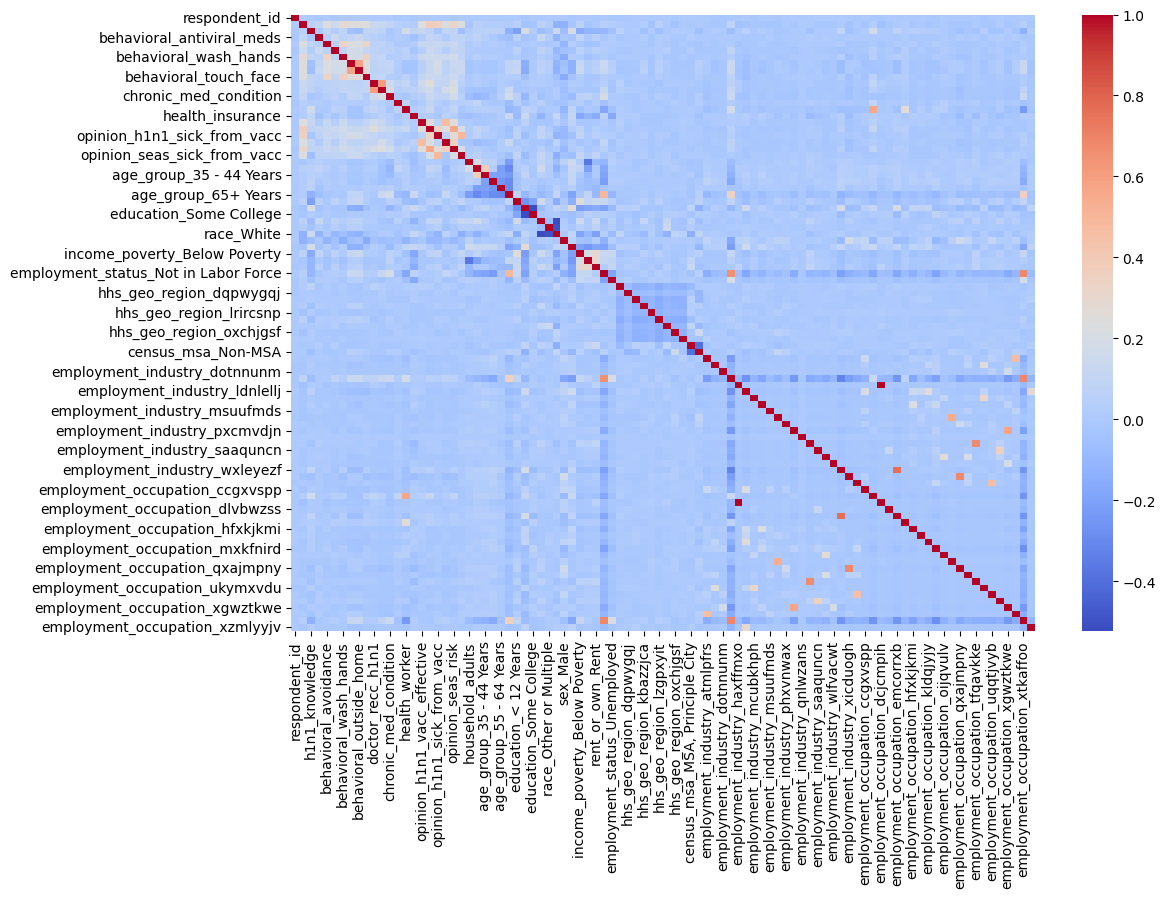

In [18]:
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_features.corr(), cmap="coolwarm", annot=False)
plt.show()


In [19]:
import joblib

# Save the trained models
joblib.dump(h1n1_model, "h1n1_model.pkl")
joblib.dump(seasonal_model, "seasonal_model.pkl")


['seasonal_model.pkl']